# Introduction to NumPy

NumPy is one of the two most important libraries in Python for data science, along with Pandas. NumPy is a crucial library for effectively loading, storing, and manipulating in-memory data in Python, all of which will be at the heart of what you do with data science in Python.

Datasets come from a huge range of sources and in a wide range of formats, such as text documents, images, sound clips, numerical measurements, and nearly anything else. Despite this variety, however, the start of data science is to think of all data fundamentally as arrays of numbers.

For example, the words in documents can be represented as the numbers that encode letters in computers or even the frequency of particular words in a collection of documents. Digital images can be thought of as two-dimensional arrays of numbers representing pixel brightness or color. Sound files can be represented as one-dimensional arrays of frequency versus time. However, no matter what form our data takes, in order to analyze it, our first step will be to transform it into arrays of numbers—which is where NumPy comes in (and pandas down the road).

NumPy is short for *Numerical Python*, and it provides an efficient means of storing and operating on dense data buffers in Python. Array-oriented computing in Python goes back to 1995 with the Numeric library. Scientific programming in Python took off over the next 10 years, but the collections of libraries splintered. The NumPy project began in 2005 as a means of bringing the Numeric and NumArray projects together around a single array-based framework.

Some examples in this section are drawn from the *Python Data Science Handbook* by Jake VanderPlas (content available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook)) and *Python for Data Analysis* by Wes McKinney. Text from the *Python Data Science Handbook* is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode); code is released under the [MIT license](https://opensource.org/licenses/MIT).

Let's get started exploring NumPy! Our first step will be to import NumPy using `np` as an alias:

In [2]:
import numpy as np

In [3]:
import sklearn as sk

Get used to this convention — it's a common convention in Python, and it's the way we will use and refer to NumPy throughout the rest of this course.

## Built-In Help

There's a lot to learn about NumPy, and it can be tough to remember it all the first time through. Don't worry! IPython — the underlying program that enables notebooks like this one to interact with Python—has you covered.

First off, IPython gives you the ability to quickly explore the contents of a package like NumPy by using the tab-completion feature. So, if you want to see all of the functions available with NumPy, type this:

```ipython
In [2]: np.<TAB>
```
When you do so, a drop-down menu will appear next to the `np.`

### Exercise

In [5]:
# Place your cursor after the period and press <TAB>:
np.

SyntaxError: invalid syntax (<ipython-input-5-f0faa50f3d63>, line 2)

From the drop-down menu, you can select any function to run. Better still, you can select any function and view the built-in help documentation for it. For example, to view the documentation for the NumPy `add()` function, you can run this code:

```ipython
In [3]: np.add?
```
Try this with a few different functions. Remember, these functions are just like ones you wrote in Section 2; the documentation will help explain what parameters you can (or should) provide the function, in addition to what output you can expect.

### Exercise

In [6]:
# Replace 'add' below with a few different NumPy function names and look over the documentation:
np.all?

For more detailed documentation (along with additional tutorials and other resources), visit [www.numpy.org](http://www.numpy.org).

Now that you know how to quickly get help while you are working on your own, let's return to storing data in arrays.

## NumPy arrays: a specialized data structure for analysis

> **Learning goal:** By the end of this subsection, you should have a basic understanding of what NumPy arrays are and how they differ from the other Python data structures you have studied thus far.

We started the discussion in this section by noting that data science starts by representing data as arrays of numbers.

"Wait!" you might be thinking. "Can't we just use Python lists for that?"

Depending on the data, yes, you could (and you will use lists as a part of working with data in Python). But to see what we might want to use a specialized data structure for, let's look a little more closely at lists.

### Lists in Python

Python lists can hold just one kind of object. Let's use one to create a list of just integers:

In [7]:
myList = list(range(20))
myList

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

Remember list comprehension? We can use it to probe the data types of items in a list:

In [8]:
[type(item) for item in myList]

[int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int]

Of course, a really handy feature of Python lists is that they can hold heterogeneous types of data in a single list object:

In [11]:
myList2 = [True, "2", 3.0, 4]
[type(item) for item in myList2]

[bool, str, float, int]

However, this flexibility comes at a price. Each item in a list is really a separate Python object (the list is an object itself, true, but mostly it is an object that serves as a container for the memory pointers to the constituent objects). That means that each item in a list must contain its own type info, reference count, and other information. All of this information can become expensive in terms of memory and performance if we are dealing with hundreds of thousands or millions of items in a list. Moreover, for many uses in data science, our arrays just store a single type of data (such as integers or floats), which means that all of the object-related information for items in such an array would be redundant. It can be much more efficient to store data in a fixed-type array.

<img align="left" style="padding-right:10px;" src="https://raw.githubusercontent.com/microsoft/computerscience/master/Educator%20Resources/Reactor%20Workshops/Data%20Science/Track%201/Graphics/Sec3_array_vs_list.png">

Enter the fixed-type, NumPy-style array.

### Fixed-type arrays in Python

At the level of implementation by the computer, the `ndarray` that is part of the NumPy package contains a single pointer to one contiguous block of data. This is efficient memory-wise and computationally. Better still, NumPy provides efficient *operations* on data stored in `ndarray` objects.

(Note that we will pretty much use “array,” “NumPy array,” and “ndarray” interchangeably throughout this section to refer to the ndarray object.)

#### Creating NumPy arrays method 1: using Python lists

There are multiple ways to create arrays in NumPy. Let's start by using our good old familiar Python lists. We will use the `np.array()` function to do this (remember, we imported NumPy as '`np`'):

In [35]:
# Create an integer array:
np.array([1, 4, 2, 5, 3])
Test =np.array([1,3,32]) 
Test 
 

array([ 1,  3, 32])

Remember that, unlike Python lists, NumPy constrains arrays to contain a single type. So, if data types fed into a NumPy array do not match, NumPy will attempt to *upcast* them if possible. To see what we mean, here NumPy upcasts integers to floats:

In [13]:
np.array([3.14, 4, 2, 3])

array([3.14, 4.  , 2.  , 3.  ])

### Exercise

In [25]:
# What happens if you construct an array using a list that contains a combination of integers, floats, and strings?
np.array([3.14, 4, 'r', 3])

array(['3.14', '4', 'r', '3'], dtype='<U32')

If you want to explicitly set the data type of your array when you create it, you can use the `dtype` keyword:

In [26]:
np.array([1, 2, 3, 4], dtype='float32')

array([1., 2., 3., 4.], dtype=float32)

### Exercise

In [28]:
# Try this using a different dtype.
# Remember that you can always refer to the documentation with the command np.array.
np.array([1,1,2,0,4], dtype='float32')

array([1., 1., 2., 0., 4.], dtype=float32)

Most usefully for a lot of applications in data science, NumPy arrays can explicitly be multidimensional (like matrices or tensors). Here's one way of creating a multidimensional array using a list of lists:

In [4]:
# nested lists result in multi-dimensional arrays
dav =np.array([range(i, i + 4) for i in [2, 4, 6]])
dav

array([[2, 3, 4, 5],
       [4, 5, 6, 7],
       [6, 7, 8, 9]])

The inner lists in a list of lists are treated as rows of the two-dimensional array you created.

#### Creating NumPy arrays method 2: building from scratch

In practice, it is often more efficient to create arrays from scratch using functions built into NumPy, particularly for larger arrays. Here are a few examples; these example will help introduce you to several useful NumPy functions.

In [37]:
# Create an integer array of length 10 filled with zeros
dav =np.zeros(10, dtype=int)
dav

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [38]:
# Create a 3x5 floating-point array filled with ones
dav=np.ones((3, 5), dtype=float)
dav

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [5]:
# Create a 3x5 array filled with 3.14
# The first number in the tuple gives the number of rows
# The second number in the tuple sets the number of columns
np.full((3, 5), 3.)

array([[3., 3., 3., 3., 3.],
       [3., 3., 3., 3., 3.],
       [3., 3., 3., 3., 3.]])

In [8]:
# Create an array filled with a linear sequence
# Starting at 0, ending at 20, stepping by 2
# (this is similar to the built-in Python range() function)
np.arange(0, 20, 2)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [13]:
# Create an array of five values evenly spaced between 0 and 1
np.linspace(0,1,14)*10

array([ 0.        ,  0.76923077,  1.53846154,  2.30769231,  3.07692308,
        3.84615385,  4.61538462,  5.38461538,  6.15384615,  6.92307692,
        7.69230769,  8.46153846,  9.23076923, 10.        ])

In [12]:
# Create a 3x3 array of uniformly distributed
# random values between 0 and 1
np.random.random((3, 3))*10

array([[5.58150844, 1.40962767, 2.13193192],
       [4.60840925, 3.60526776, 8.88012233],
       [3.71931624, 6.14155131, 9.29674558]])

In [44]:
# Create a 3x3 array of normally distributed random values
# with mean 0 and standard deviation 1
np.random.normal(0, 1, (3, 3))

array([[-1.29426529, -0.40440395,  0.12863212],
       [-0.51026914,  0.11589324,  0.70218506],
       [-0.19242301,  0.37890976, -0.00938413]])

In [45]:
# Create a 3x3 array of random integers in the interval [0, 10)
np.random.randint(0, 10, (3, 3))

array([[4, 3, 5],
       [7, 0, 9],
       [3, 5, 4]])

In [46]:
# Create a 3x3 identity matrix
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [47]:
# Create an uninitialized array of three integers
# The values will be whatever happens to already exist at that memory location
np.empty(3)

array([1., 1., 1.])

Now take a couple of minutes to go back and play with these code snippets, changing the parameters. These functions are the bread-and-butter of creating NumPy arrays and you will want to become comfortable with them.

Below is a table listing out several of the array-creation functions in NumPy.

| Function      | Description |
|:--------------|:------------|
| `array`       | Converts input data (list, tuple, array, or other sequence type) to an ndarray either |
|               | by inferring a dtype or explicitly specifying a dtype. Copies the input data by default. |
| `asarray`     | Converts input to ndarray, but does not copy if the input is already an ndarray. |
| `arange`      | Similar to the built-in `range()` function but returns an ndarray instead of a list. |
| `ones`, `ones_like` | Produces an array of all 1s with the given shape and dtype. |
|               | `ones_like` takes another array and produces a ones-array of the same shape and dtype. |
| `zeros`, `zeros_like` | Similar to `ones` and `ones_like` but producing arrays of 0s instead. |
| `empty`, `empty_like` | Creates new arrays by allocating new memory, but does not populate with any values 
|               | like `ones` and `zeros`. |
| `full`, `full_like` | Produces an array of the given shape and dtype with all values set to the indicated “fill value.” |
|               | `full_like` takes another array and produces a a filled array of the same shape and dtype. |
| `eye`, `identity` | Create a square $N \times N$ identity matrix (1s on the diagonal and 0s elsewhere) |

### NumPy data types

The standard NumPy data types are listed in the following table. Note that when constructing an array, they can be specified using a string:

```python
np.zeros(8, dtype='int16')
```

Or they can be specified directly using the NumPy object:

```python
np.zeros(8, dtype=np.int16)
```

| Data type	    | Description |
|:--------------|:------------|
| ``bool_``     | Boolean (True or False) stored as a byte |
| ``int_``      | Default integer type (same as C ``long``; normally either ``int64`` or ``int32``)| 
| ``intc``      | Identical to C ``int`` (normally ``int32`` or ``int64``)| 
| ``intp``      | Integer used for indexing (same as C ``ssize_t``; normally either ``int32`` or ``int64``)| 
| ``int8``      | Byte (-128 to 127)| 
| ``int16``     | Integer (-32768 to 32767)|
| ``int32``     | Integer (-2147483648 to 2147483647)|
| ``int64``     | Integer (-9223372036854775808 to 9223372036854775807)| 
| ``uint8``     | Unsigned integer (0 to 255)| 
| ``uint16``    | Unsigned integer (0 to 65535)| 
| ``uint32``    | Unsigned integer (0 to 4294967295)| 
| ``uint64``    | Unsigned integer (0 to 18446744073709551615)| 
| ``float_``    | Shorthand for ``float64``.| 
| ``float16``   | Half-precision float: sign bit, 5 bits exponent, 10 bits mantissa| 
| ``float32``   | Single-precision float: sign bit, 8 bits exponent, 23 bits mantissa| 
| ``float64``   | Double-precision float: sign bit, 11 bits exponent, 52 bits mantissa| 
| ``complex_``  | Shorthand for ``complex128``.| 
| ``complex64`` | Complex number, represented by two 32-bit floats| 
| ``complex128``| Complex number, represented by two 64-bit floats| 

If these data types seem a lot like those in C, that's because NumPy is built in C.

> **Takeaway:** NumPy arrays are a data structure similar to Python lists that provide high performance when storing and working on large amounts of homogeneous data—precisely the kind of data that you will encounter frequently in doing data science. NumPy arrays support many data types beyond those discussed in this course. With all of that said, however, don’t worry about memorizing all of the NumPy dtypes. **It’s often just necessary to care about the general kind of data you’re dealing with: floating point, integer, Boolean, string, or general Python object.**

## Working with NumPy arrays: the basics

> **Learning goal:** By the end of this subsection, you should be comfortable working with NumPy arrays in basic ways.

Now that you know how to create arrays in NumPy, you need to get comfortable manipulating them for two reasons. First, you will work with NumPy arrays as part of your exploration of data science. Second, our other important Python data-science tool, pandas, is actually built around NumPy. Getting good at working with NumPy arrays will pay dividends in the next section (Section 4) and beyond: NumPy arrays are the building blocks for the `Series` and `DataFrame` data structures in the Python pandas library and you will use them *a lot* in data science. To get comfortable with array manipulation, we will cover five specifics:
- **Arrays attributes**: Assessing the size, shape, and data types of arrays
- **Indexing arrays**: Getting and setting the value of individual array elements
- **Slicing arrays**: Getting and setting smaller subarrays within a larger array
- **Reshaping arrays**: Changing the shape of a given array
- **Joining and splitting arrays**: Combining multiple arrays into one and splitting one array into multiple arrays

### Array attributes
First, let's look at some array attributes. We'll start by defining three arrays filled with random numbers: one one-dimensional, another two-dimensional, and the last three-dimensional. Because we will be using NumPy's random number generator, we will set a *seed* value in order to ensure that you get the same random arrays each time you run this code:

In [14]:
import numpy as np
np.random.seed(0)  # seed for reproducibility

a1 = np.random.randint(10, size=6)  # One-dimensional array
a2 = np.random.randint(10, size=(3, 4))  # Two-dimensional array
a3 = np.random.randint(10, size=(3, 4, 5))  # Three-dimensional array

Each array has attributes ``ndim`` (the number of dimensions of an array), ``shape`` (the size of each dimension of an array), and ``size`` (the total number of elements in an array).

### Exercise:

In [16]:
# Change the values in this code snippet to look at the attributes for a1, a2, and a3:
print("a3 ndim: ", a3.ndim)
print("a3 shape:", a3.shape)
print("a3 size: ", a3.size)
print(a3)

a3 ndim:  3
a3 shape: (3, 4, 5)
a3 size:  60
[[[8 1 5 9 8]
  [9 4 3 0 3]
  [5 0 2 3 8]
  [1 3 3 3 7]]

 [[0 1 9 9 0]
  [4 7 3 2 7]
  [2 0 0 4 5]
  [5 6 8 4 1]]

 [[4 9 8 1 1]
  [7 9 9 3 6]
  [7 2 0 3 5]
  [9 4 4 6 4]]]


Another useful array attribute is the `dtype`, which we already encountered earlier in this section as a means of determining the type of data in an array:

In [51]:
print("dtype:", a3.dtype)

dtype: int64


### Exercise:

In [52]:
# Explore the dtype for the other arrays.
# What dtypes do you predict them to have?
print("dtype:", a3.dtype)

dtype: int64


### Indexing arrays

Indexing in NumPy is pretty similar to indexing lists in standard Python. In fact, indices in one-dimensional arrays work exactly as they do with Python lists:

In [53]:
a1

array([5, 0, 3, 3, 7, 9])

In [54]:
a1[0]

5

In [55]:
a1[4]

7

As with regular Python lists, in order to index from the end of the array, you can use negative indices:

In [56]:
a1[-1]

9

In [57]:
a1[-2]

7

### Exercise:

In [64]:
# Do multidimensional NumPy arrays work like Python lists of lists?
# Try a few combinations like a2[1][1] or a3[0][2][1] and see what comes back
a1[-3]

3

You might have noticed that we can treat multidimensional arrays like lists of lists. But a more common means of accessing items in multidimensional arrays is to use a comma-separated tuple of indices.

(Yes, we realize that these comma-separated tuples use square brackets rather than the parentheses the name might suggest, but they are nevertheless referred to as tuples.)

In [17]:
a2

array([[3, 5, 2, 4],
       [7, 6, 8, 8],
       [1, 6, 7, 7]])

In [18]:
a2[0, 0]

3

In [ ]:
a2[2, 0]

In [ ]:
a2[2, -1]

You can also modify values by use of this same comma-separated index notation:

In [ ]:
a2[0, 0] = 12
a2

Remember, once defined, NumPy arrays have a fixed data type. So, if you attempt to insert a float into an integer array, the value will be silently truncated.

In [19]:
a1[0] = 3.14159
a1

array([3, 0, 3, 3, 7, 9])

### Exercise:

In [22]:
# What happens if you try to insert a string into a1?
# Hint: try both a string like '3' and one like 'three'
a1[1]="3"
a1

array([3, 3, 3, 3, 7, 9])

### Slicing arrays
Similar to how you can use square brackets to access individual array elements, you can also use them to access subarrays. You do this with the *slice* notation, marked by the colon (`:`) character. NumPy slicing syntax follows that of the standard Python list; so, to access a slice of an array `a`, use this notation:
``` python
a[start:stop:step]
```
If any of these are unspecified, they default to the values ``start=0``, ``stop=``*``size of dimension``*, ``step=1``.
Let's take a look at accessing sub-arrays in one dimension and in multiple dimensions.

#### One-dimensional slices

In [24]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [66]:
a[:5]  # first five elements

array([0, 1, 2, 3, 4])

In [69]:
a[5:]  # elements after index 5

array([5, 6, 7, 8, 9])

In [68]:
a[4:7]  # middle sub-array

array([4, 5, 6])

In [70]:
a[::2]  # every other element

array([0, 2, 4, 6, 8])

In [67]:
a[1::2]  # every other element, starting at index 1

array([1, 3, 5, 7, 9])

### Exercise:

In [25]:
# How would you access the *last* five elements of array a?
# How about every other element of the last five elements of a?
# Hint: Think back to list indexing in Python
a[5:]

array([5, 6, 7, 8, 9])

Be careful when using negative values for ``step``. When ``step`` has a negative value, the defaults for ``start`` and ``stop`` are swapped and you can use this functionality to reverse an array:

In [71]:
a[::-1]  # all elements, reversed

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

In [72]:
a[5::-2]  # reversed every other from index 5

array([5, 3, 1])

### Exercise:

In [ ]:
# How can you create a slice that contains every third element of a
# descending from the second-to-last element to the second element of a?


#### Multidimensional slices

Multidimensional slices use the same slice notation of one-dimensional subarrays mixed with the comma-separated notation of multidimensional arrays. Some examples will help illustrate this.

In [73]:
a2

array([[3, 5, 2, 4],
       [7, 6, 8, 8],
       [1, 6, 7, 7]])

In [74]:
a2[:2, :3]  # two rows, three columns

array([[3, 5, 2],
       [7, 6, 8]])

In [75]:
a2[:3, ::2]  # all rows, every other column

array([[3, 2],
       [7, 8],
       [1, 7]])

Finally, subarray dimensions can even be reversed together:

In [76]:
a2[::-1, ::-1]

array([[7, 7, 6, 1],
       [8, 8, 6, 7],
       [4, 2, 5, 3]])

### Exercise:

In [ ]:
# Now try to show 2 rows and 4 columns with every other element?


#### Accessing array rows and columns
One thing you will often need to do in manipulating data is accessing a single row or column in an array. You can do this through a combination of indexing and slicing; specifically by using an empty slice marked by a single colon (``:``). Again, some examples will help illustrate this.

In [77]:
print(a2[:, 0])  # first column of x2

[3 7 1]


In [78]:
print(a2[0, :])  # first row of x2

[3 5 2 4]


In the case of row access, the empty slice can be omitted for a more compact syntax:

In [79]:
print(a2[0])  # equivalent to a2[0, :]

[3 5 2 4]


### Exercise:

In [ ]:
# How would you access the third column of a3?
# How about the third row of a3?


#### Slices are no-copy views
It's important to know that slicing produces *views* of array data, not *copies*. This is a **huge** difference between NumPy array slicing and Python list slicing. With Python lists, slices are only shallow copies of lists; if you modify a copy, it doesn't affect the parent list. When you modify a NumPy subarray, you modify the original list. Be careful: this can have ramifications when you are trying to just work with a small part of a large dataset and you don’t want to change the whole thing. Let's look more closely.

In [26]:
print(a2)

[[3 5 2 4]
 [7 6 8 8]
 [1 6 7 7]]


Extract a $2 \times 2$ subarray from `a2`:

In [27]:
a2_sub = a2[:2, :2]
print(a2_sub)

[[3 5]
 [7 6]]


Now modify this subarray:

In [28]:
a2_sub[0, 0] = 99
print(a2_sub)

[[99  5]
 [ 7  6]]


`a2` is now modified as well:

In [29]:
print(a2)

[[99  5  2  4]
 [ 7  6  8  8]
 [ 1  6  7  7]]


### Exercise:

In [ ]:
# Now try reversing the column and row order of a2_sub
# Does a2 look the way you expected it would after that manipulation?


The fact that slicing produces views rather than copies is useful for data-science work. As you work with large datasets, you will often find that it is easier to access and manipulate pieces of those datasets rather than copying them entirely.

#### Copying arrays
Instead of just creating views, sometimes it is necessary to copy the data in one array to another. When you need to do this, use the `copy()` method:

In [85]:
a2_sub_copy = a2[:2, :2].copy()
print(a2_sub_copy)

[[3 5]
 [7 6]]


If we now modify this subarray, the original array is not touched:

In [86]:
a2_sub_copy[0, 0] = 42
print(a2_sub_copy)

[[42  5]
 [ 7  6]]


In [ ]:
print(a2)

### Reshaping arrays
Another way in which you will need to manipulate arrays is by reshaping them. This involves changing the number and size of dimensions of an array. This kind of manipulation can be important in getting your data to meet the expectations of machine learning programs or APIs.

The most flexible way of doing this kind of manipulation is with the `reshape` method. For example, if you want to put the numbers 1 through 9 in a $3 \times 3$ grid, you can do the following:

In [30]:
grid = np.arange(1, 10).reshape((3, 3))
print(grid)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


Another common manipulation you will do in data science is converting one-dimensional arrays into two-dimensional row or column matrices. This can be a common necessity when doing linear algebra for machine learning. While you can do this by means of the `reshape` method, an easier way is to use the `newaxis` keyword in a slice operation:

In [31]:
a = np.array([1, 2, 3])

# row vector via reshape
a.reshape((1, 3))

array([[1, 2, 3]])

In [32]:
# row vector via newaxis
a[np.newaxis, :]

array([[1, 2, 3]])

In [33]:
# column vector via reshape
a.reshape((3, 1))

array([[1],
       [2],
       [3]])

In [34]:
# column vector via newaxis
a[:, np.newaxis]

array([[1],
       [2],
       [3]])

You will see this type of transformation a lot in the remainder of this course.

### Joining and splitting arrays

Another common data-manipulation need in data science is combining multiple datasets; learning first how to do this with NumPy arrays will help you in the next section (Section 4) when we do this with more complex data structures. You will many times also need to split a single array into multiple arrays.

#### Joining arrays
To join arrays in NumPy, you will most often use `np.concatenate`, which is the method we will cover here. If you find yourself in the future needing to specifically join arrays in mixed dimensions (a rarer case), read the documentation on `np.vstack`, `np.hstack`, and `np.dstack`.

##### `np.concatenate()`

`np.concatenate` takes a tuple or list of arrays as its first argument:

In [81]:
a = np.array([1, 2, 3])
b = np.array([3, 2, 1])
np.concatenate([a, b])

array([1, 2, 3, 3, 2, 1])

You can also concatenate more than two arrays at once:

In [82]:
c = [99, 99, 99]
print(np.concatenate([a, b, c]))

[ 1  2  3  3  2  1 99 99 99]


`np.concatenate` can also be used for two-dimensional arrays:

In [83]:
grid = np.array([[1, 2, 3],
                 [4, 5, 6]])

In [84]:
# concatenate along the first axis, which is the default
np.concatenate([grid, grid])

array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 3],
       [4, 5, 6]])

### Exercise:

In [ ]:
# Recall that axes are zero-indexed in NumPy.
# What do you predict np.concatenate([grid, grid], axis=1) will produce?


#### Splitting arrays
In order to split arrays into multiple smaller arrays, you can use the functions ``np.split``, ``np.hsplit``, ``np.vsplit``, and ``np.dsplit``.  As above, we will only cover the most commonly used function (`np.split`) in this course.

##### `np.split()`
Let's first examine the case of a one-dimensional array:

In [35]:
a = [1, 2, 3, 99, 99, 3, 2, 1]
a1, a2, a3 = np.split(a, [3, 5])
print(a1, a2, a3)

[1 2 3] [99 99] [3 2 1]


Notice that *N* split-points produces to *N + 1* subarrays. In this case it has formed the subarray `a2` with `a[3]` and `a[4]` (the element just before position 5 [remember how Python indexing goes], the second input in the tuple) as elements. `a1` and `a3` pick up the leftover portions from the original array `a`.

### Exercise:

In [80]:
grid = np.arange(16).reshape((4, 4))
grid

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [36]:
# What does np.split(grid, [1, 2]) produce?
# What about
np.split(grid, [1, 2], axis=1)


[array([[1],
        [4],
        [7]]), array([[2],
        [5],
        [8]]), array([[3],
        [6],
        [9]])]

> **Takeaway:** Manipulating datasets is a fundamental part of preparing data for analysis. The skills you learned and practiced here will form building blocks for the most sophisticated data-manipulation you will learn in later sections in this course.

## Fancy indexing

So far, we have explored how to access and modify portions of arrays using simple indices like `arr[0]`) and slices like `arr[:5]`. Now it is time for fancy indexing, in which we pass an array of indices to an array in order to access or modify multiple array elements at the same time.

Let's try it out:

In [87]:
rand = np.random.RandomState(42)

arr = rand.randint(100, size=10)
print(arr)

[51 92 14 71 60 20 82 86 74 74]


Suppose you need to access three different elements. Using the tools you currently have, your code might look something like this:

In [88]:
[arr[3], arr[7], arr[2]]

[71, 86, 14]

With fancy indexing, you can pass a single list or array of indices to do the same thing:

In [89]:
ind = [3, 7, 4]
arr[ind]

array([71, 86, 60])

Another useful aspect of fancy indexing is that the shape of the output array reflects the shape of the *index arrays* you supply, rather than the shape of the array you are accessing. This is handy because there will be many times in a data scientist's life when they want to grab data from an array in a particular manner, such as to pass it to a machine learning API. Let's examine this property with an example:

In [90]:
ind = np.array([[3, 7],
                [4, 5]])
arr[ind]

array([[71, 86],
       [60, 20]])

`arr` is a one-dimensional array, but `ind`, your index array, is a $2 \times 2$ array, and that is the shape the results comes back in.

### Exercise:

In [ ]:
# What happens when your index array is bigger than the target array?
# Hint: you could use a large one-dimensional array or something fancier like ind = np.arange(0, 12).reshape((6, 2))


Fancy indexing also works in multiple dimensions:

In [91]:
arr2 = np.arange(12).reshape((3, 4))
arr2

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

As with standard indexing, the first index refers to the row and the second to the column:

In [92]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
arr2[row, col]

array([ 2,  5, 11])

What did you actually get as your final result here? The first value in the result array is `arr2[0, 2]`, the second one is `arr2[1, 1]`, and the third one is `arr2[2, 3]`.

The pairing of indices in fancy indexing follows all the same broadcasting rules we covered earlier. Thus, if you combine a column vector and a row vector within the indices, you get a two-dimensional result:

In [93]:
arr2[row[:, np.newaxis], col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

Here, each row value is matched with each column vector, exactly as we saw in broadcasting of arithmetic operations.

### Exercise:

In [ ]:
# Now try broadcasting this on your own.
# What do you get with row[:, np.newaxis] * col? 
# Or row[:, np.newaxis] * row? col[:, np.newaxis] * row?
# What about col[:, np.newaxis] * row?
# Hint: think back to the broadcast rules
arr2

**The big takeaway:** It is always important to remember that fancy indexing returns values reflected by the *broadcasted shape of the indices*, and not the shape of the array being indexed.

### Combined indexing

You can also combine fancy indexing with the other indexing schemes you have learned. Consider `arr2` again:

In [94]:
print(arr2)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


Now combine fancy and simple indices:

In [ ]:
arr2[2, [2, 0, 1]]

What did you get back? The elements at positions 2, 0, and 1 of row 2 (the third row).

You can also combine fancy indexing with slicing:

In [95]:
arr2[1:, [2, 0, 1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

Again, consider what you got back as output: the elements at positions 2, 0, and 1 of each row after the first one (so the second and third rows).

Of course, you can also combine fancy indexing with masking:

In [96]:
mask = np.array([1, 0, 1, 0], dtype=bool)
arr2[row[:, np.newaxis], mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

### Modifying values using fancy indexing

Fancy indexing is, of course, not just for accessing parts of an array, but also for modifying parts of an array:

In [97]:
ind = np.arange(10)
arr = np.array([2, 1, 8, 4])
ind[arr] = 99
print(ind)

[ 0 99 99  3 99  5  6  7 99  9]


You can also use a ufunc here and subtract 10 from each element of the array:

In [98]:
ind[arr] -= 10
print(ind)

[ 0 89 89  3 89  5  6  7 89  9]


Be cautious when using repeated indices with operations like these. They might not always produce the results you expect. For example:

In [99]:
ind = np.zeros(10)
ind[[0, 0]] = [4, 6]
print(ind)

[6. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Where did the 4 go? The result of this operation is to first assign `ind[0] = 4`, followed by `ind[0] = 6`. So the result is that `ind[0]` contains the value 6.

But not every operation repeats the way you might think it should:

In [100]:
arr = [2, 3, 3, 4, 4, 4]
ind[arr] += 1
ind

array([6., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

We might have expected that `ind[3]` would contain the value 2 and `ind[4]` would contain the value 3. After all, that is how many times each index is repeated. So what happened?

This happened because `ind[arr] += 1` is really shorthand for `ind[arr] = ind[arr] + 1`. `ind[arr] + 1` is evaluated, and then the result is assigned to the indices in `ind`. So, similar to the previous example, this is not augmentation that happens multiple times, but an assignment, which can lead to potentially counterintuitive results.

But what if you want an operation to repeat? To do this, use the `at()` method of ufuncs:

In [ ]:
ind = np.zeros(10)
np.add.at(ind, arr, 1)
print(ind)

### Exercise:

In [ ]:
# What does np.subtract.at(ind, arr, 1) give you?
# Play around with some of the other ufuncs we have seen.


> **Takeaway:** Fancy indexing enables you to select and manipulate several array members at once. This type of programmatic data manipulation is common in data science: often what you want to do with your data you want to do on several data points at once.

## Sorting arrays

So far we have just worried about accessing and modifying NumPy arrays. Another huge thing you will need to do as a data scientist is sort array data. Sorting is often an important means of teasing out the structure in data (such as outlying data points).

Although you could use Python's built-in `sort` and `sorted` functions, they will not work nearly as efficiently as NumPy's `np.sort` function.

`np.sort` returns a sorted version of an array without modifying the input:

In [101]:
a = np.array([2, 1, 4, 3, 5])
np.sort(a)

array([1, 2, 3, 4, 5])

In order to sort the array in-place, use the `sort` method directly on arrays:

In [102]:
a.sort()
print(a)

[1 2 3 4 5]


A related function is `argsort`, which returns the *indices* of the sorted elements rather than the elements themselves:

In [103]:
a = np.array([2, 1, 4, 3, 5])
b = np.argsort(a)
print(b)

[1 0 3 2 4]


The first element of this result gives the index of the smallest element, the second value gives the index of the second smallest, and so on. These indices can then be used (via fancy indexing) to reconstruct the sorted array:

In [104]:
a[b]

array([1, 2, 3, 4, 5])

### Sorting along rows or columns

A useful feature of NumPy's sorting algorithms is the ability to sort along specific rows or columns of a multidimensional array using the `axis` argument. For example:

In [105]:
rand = np.random.RandomState(42)
table = rand.randint(0, 10, (4, 6))
print(table)

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


In [106]:
# Sort each column of the table
np.sort(table, axis=0)

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [107]:
# Sort each row of the table
np.sort(table, axis=1)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

Bear in mind that this treats each row or column as an independent array; any relationships between the row or column values will be lost doing this kind of sorting.

## Partial sorting: partitioning

Sometimes you don't need to sort an entire array, you just need to find the *k* smallest values in the array (often when looking at the distance of data points from one another). NumPy supplies this functionality through the `np.partition` function. `np.partition` takes an array and a number *k*; the result is a new array with the smallest *k* values to the left of the partition, and the remaining values to the right (in arbitrary order):

In [108]:
arr = np.array([7, 2, 3, 1, 6, 5, 4])
np.partition(arr, 3)

array([2, 1, 3, 4, 6, 5, 7])

Note that the first three values in the resulting array are the three smallest in the array, and the remaining array positions contain the remaining values. Within the two partitions, the elements have arbitrary order.

Similarly to sorting, we can partition along an arbitrary axis of a multidimensional array:

In [109]:
np.partition(table, 2, axis=1)

array([[3, 4, 6, 7, 6, 9],
       [2, 3, 4, 7, 6, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 9, 5]])

The result is an array where the first two slots in each row contain the smallest values from that row, with the remaining values filling the remaining slots.

Finally, just as there is an `np.argsort` that computes indices of the sort, there is an `np.argpartition` that computes indices of the partition. We'll see this in action in the following section when we discuss pandas.

> **Takeaway:** Sorting your data is a fundamental means of exploring it and answering questions about it. The sorting algorithms in NumPy provide you with a fast, computationally efficient way of doing this on large amounts of data and with fine-grain control.

## Efficient computation on NumPy arrays: Universal functions

> **Learning goal:** By the end of this subsection, you should have a basic understanding of what NumPy universal functions are and how (and why) to use them.

Some of the properties that make Python great to work with for data science (its dynamic, interpreted nature, for example) can also make it slow. This is particularly true with looping. These small performance hits can add up to minutes (or longer) when dealing with truly huge datasets.

When we first examined loops in the Introduction to Pything, you probably didn't notice any delay: the loops were short enough that Python’s relatively slow looping wasn’t an issue. Consider this function, which calculates the reciprocal for an array of numbers:

In [37]:
import numpy as np
np.random.seed(0)

def compute_reciprocals(values):
    output = np.empty(len(values))
    for i in range(len(values)):
        output[i] = 1.0 / values[i]
    return output
        
values = np.random.randint(1, 10, size=5)
compute_reciprocals(values)

array([0.16666667, 1.        , 0.25      , 0.25      , 0.125     ])

Running this loop, it was probably difficult to even discern that execution wasn't instantaneous.

But let’s try it on a much larger array. To empirically do this, we'll time this with IPython's `%timeit` magic command.

In [39]:
big_array = np.random.randint(1, 100, size=1000000)
%timeit compute_reciprocals(big_array)

12.8 s ± 408 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


You certainly noticed that delay. The slowness of this looping becomes noticeable when we repeat many small operations many times.

The performance bottleneck is not the operations themselves, but the type-checking and function dispatches that Python performs on each cycle of the loop. In the case of the `compute_reciprocals` function above, each time Python computes the reciprocal, it first examines the object's type and does a dynamic lookup of the correct function to use for that type. Such is life with interpreted code. However, were we working with compiled code instead (such as in C), the object-type specification would be known before the code executes, and the result could be computed much more efficiently. This is where NumPy universal functions come into play.

### Ufuncs

Universal functions in NumPy (often shortened to *ufuncs*) provide a statically typed, compiled function for many of the operations that we will need to run in the course of manipulating and analyzing data.

Let's examine what this means in practice. Let's find the reciprocals of `big_array` again, this time using a built-in NumPy division ufunc on the array:

In [40]:
%timeit (1.0 / big_array)

14.5 ms ± 221 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


That’s orders of magnitude better.

Ufuncs can be used between a scalar and an array and between arrays of arbitrary dimensions.

Computations vectorized by ufuncs are almost always more efficient than doing the same computation using Python loops. This is especially true on large arrays. When possible, try to use ufuncs when operating on NumPy arrays, rather than using ordinary Python loops.

Ufuncs come in two flavors: *unary ufuncs*, which use a single input, and *binary ufuncs*, which operate on two inputs. The common ufuncs we'll look at here encompass both kinds.

#### Array arithmetic

Many NumPy ufuncs use Python's native arithmetic operators, so you can use the standard addition, subtraction, multiplication, and division operators that we covered in Section 1:

In [113]:
a = np.arange(4)
print("a     =", a)
print("a + 5 =", a + 5)
print("a - 5 =", a - 5)
print("a * 2 =", a * 2)
print("a / 2 =", a / 2)
print("a // 2 =", a // 2)  # floor division

a     = [0 1 2 3]
a + 5 = [5 6 7 8]
a - 5 = [-5 -4 -3 -2]
a * 2 = [0 2 4 6]
a / 2 = [0.  0.5 1.  1.5]
a // 2 = [0 0 1 1]


There are also ufuncs for negation, exponentiation, and the modulo operation:

In [114]:
print("-a     = ", -a)
print("a ** 2 = ", a ** 2)
print("a % 2  = ", a % 2)

-a     =  [ 0 -1 -2 -3]
a ** 2 =  [0 1 4 9]
a % 2  =  [0 1 0 1]


You can also combine these ufuncs using the standard order of operations:

In [115]:
-(0.5*a + 1) ** 2

array([-1.  , -2.25, -4.  , -6.25])

The Python operators are not actually the ufuncs, but are rather wrappers around functions built into NumPy. So the `+` operator is actually a wrapper for the `add` function:

In [116]:
np.add(a, 2)

array([2, 3, 4, 5])

Here is a cheat sheet for the equivalencies between Python operators and NumPy ufuncs:

| Operator	    | Equivalent ufunc    | Description                           |
|:--------------|:--------------------|:--------------------------------------|
|``+``          |``np.add``           |Addition (e.g., ``1 + 1 = 2``)         |
|``-``          |``np.subtract``      |Subtraction (e.g., ``3 - 2 = 1``)      |
|``-``          |``np.negative``      |Unary negation (e.g., ``-2``)          |
|``*``          |``np.multiply``      |Multiplication (e.g., ``2 * 3 = 6``)   |
|``/``          |``np.divide``        |Division (e.g., ``3 / 2 = 1.5``)       |
|``//``         |``np.floor_divide``  |Floor division (e.g., ``3 // 2 = 1``)  |
|``**``         |``np.power``         |Exponentiation (e.g., ``2 ** 3 = 8``)  |
|``%``          |``np.mod``           |Modulus/remainder (e.g., ``9 % 4 = 1``)|

Python Boolean operators also work; we will explore those later in this section.

#### Absolute value

NumPy also understands Python's built-in absolute value function:

In [ ]:
a = np.array([-2, -1, 0, 1, 2])
abs(a)

This corresponds to the NumPy ufunc `np.absolute` (which is also available under the alias `np.abs`):

In [ ]:
np.absolute(a)

In [ ]:
np.abs(a)

#### Exponents and logarithms

You will need to use exponents and logarithms a lot in data science; these are some of the most common data transformations for machine learning and statistical work.

In [117]:
a = [1, 2, 3]
print("a     =", a)
print("e^a   =", np.exp(a))
print("2^a   =", np.exp2(a))
print("3^a   =", np.power(3, a))

a     = [1, 2, 3]
e^a   = [ 2.71828183  7.3890561  20.08553692]
2^a   = [2. 4. 8.]
3^a   = [ 3  9 27]


The basic `np.log` gives the natural logarithm; if you need to compute base-2 or base-10 logarithms, NumPy also provides those:

In [118]:
a = [1, 2, 4, 10]
print("a        =", a)
print("ln(a)    =", np.log(a))
print("log2(a)  =", np.log2(a))
print("log10(a) =", np.log10(a))

a        = [1, 2, 4, 10]
ln(a)    = [0.         0.69314718 1.38629436 2.30258509]
log2(a)  = [0.         1.         2.         3.32192809]
log10(a) = [0.         0.30103    0.60205999 1.        ]


There are also some specialized versions of these ufuncs to help maintain precision when dealing with very small inputs:

In [119]:
a = [0, 0.001, 0.01, 0.1]
print("exp(a) - 1 =", np.expm1(a))
print("log(1 + a) =", np.log1p(a))

exp(a) - 1 = [0.         0.0010005  0.01005017 0.10517092]
log(1 + a) = [0.         0.0009995  0.00995033 0.09531018]


These functions give more precise values than if you were to use the raw `np.log` or `np.exp` on very small values of `a`.

#### Specialized ufuncs

NumPy has many other ufuncs. Another source for specialized and obscure ufuncs is the submodule `scipy.special`. If you need to compute some specialized mathematical or statistical function on your data, chances are it is implemented in `scipy.special`.

In [120]:
from scipy import special

In [121]:
# Gamma functions (generalized factorials) and related functions
a = [1, 5, 10]
print("gamma(a)     =", special.gamma(a))
print("ln|gamma(a)| =", special.gammaln(a))
print("beta(a, 2)   =", special.beta(a, 2))

gamma(a)     = [1.0000e+00 2.4000e+01 3.6288e+05]
ln|gamma(a)| = [ 0.          3.17805383 12.80182748]
beta(a, 2)   = [0.5        0.03333333 0.00909091]


> **Takeaway:** Universal functions in NumPy provide you with computational functions that are faster than regular Python functions, particularly when working on large datasets that are common in data science. This speed is important because it can make you more efficient as a data scientist and it makes a broader range of inquiries into your data tractable in terms of time and computational resources.

## Aggregations

> **Learning goal:** By the end of this subsection, you should be comfortable aggregating data in NumPy.

One of the first things you will find yourself doing with most datasets is computing the summary statistics for the data in order to get a general overview of your data before exploring it further. These summary statistics include the mean and standard deviation, in addition to other aggregates, such as the sum, product, median, minimum and maximum, or quantiles of the data.

NumPy has fast built-in aggregation functions for working on arrays that are the subject of this sub-section.

### Summing the values of an array

You can use the built-in Python `sum` function to sum up the values in an array.

In [122]:
import numpy as np

In [123]:
myList = np.random.random(100)
sum(myList)

50.461758453195614

If you guessed that there is also a built-in NumPy function for this, you guessed correctly:

In [124]:
np.sum(myList)

50.46175845319564

And if you guessed that the NumPy version is faster, you are doubly correct:

In [126]:
large_array = np.random.rand(1000000)
%timeit sum(large_array)
%timeit np.sum(large_array)

646 ms ± 28.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.58 ms ± 45.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


For all their similarity, bear in mind that `sum` and `np.sum` are not identical; their optional arguments have different meanings, and `np.sum` is aware of multiple array dimensions.

### Minimum and maximum

Just as Python has built-in `min` and `max` functions, NumPy has similar, vectorized versions:

In [127]:
np.min(large_array), np.max(large_array)

(2.067514368597756e-07, 0.999997425247757)

You can also use `min`, `max`, and `sum` (and several other NumPy aggregates) as methods of the array object itself:

In [128]:
print(large_array.min(), large_array.max(), large_array.sum())

2.067514368597756e-07 0.999997425247757 499824.08189940057


### Multidimensional aggregates

Because you will often treat the rows and columns of two-dimensional arrays differently (treating columns as variables and rows as observations of those variables, for example), it can often be desirable to aggregate array data along a row or column. Let's consider a two-dimensional array:

In [129]:
md = np.random.random((3, 4))
print(md)

[[0.67116226 0.62982469 0.91426129 0.68221357]
 [0.85605843 0.17886    0.92158932 0.58354976]
 [0.4787359  0.86982432 0.3930739  0.09027883]]


Unless you specify otherwise, each NumPy aggregation function will compute the aggregate for the entire array. Hence:

In [130]:
md.sum()

7.269432268583035

Aggregation functions take an additional argument specifying the *axis* along which to compute the aggregation. For example, we can find the minimum value within each column by specifying `axis=0`:

In [131]:
md.min(axis=0)

array([0.4787359 , 0.17886   , 0.3930739 , 0.09027883])

### Exercise:

In [135]:
# What do ymd.min(axis=0)ou get when you try md.max(axis=1)?
md.max(axis=1)


array([0.91426129, 0.92158932, 0.86982432])

Remember that the `axis` keyword specifies the *dimension of the array that is to be collapsed*, not the dimension that will be returned. Thus specifying `axis=0` means that the first axis will be the one collapsed: for two-dimensional arrays, this means that values within each column will be aggregated.

### Other aggregation functions

The table below lists other aggregation functions in NumPy. Most NumPy aggregates have a '`NaN`-safe' version, which computes the result while ignoring missing values marked by the `NaN` value.

|Function Name      |   NaN-safe Version  | Description                                   |
|:------------------|:--------------------|:----------------------------------------------|
| ``np.sum``        | ``np.nansum``       | Compute sum of elements                       |
| ``np.prod``       | ``np.nanprod``      | Compute product of elements                   |
| ``np.mean``       | ``np.nanmean``      | Compute mean of elements                      |
| ``np.std``        | ``np.nanstd``       | Compute standard deviation                    |
| ``np.var``        | ``np.nanvar``       | Compute variance                              |
| ``np.min``        | ``np.nanmin``       | Find minimum value                            |
| ``np.max``        | ``np.nanmax``       | Find maximum value                            |
| ``np.argmin``     | ``np.nanargmin``    | Find index of minimum value                   |
| ``np.argmax``     | ``np.nanargmax``    | Find index of maximum value                   |
| ``np.median``     | ``np.nanmedian``    | Compute median of elements                    |
| ``np.percentile`` | ``np.nanpercentile``| Compute rank-based statistics of elements     |
| ``np.any``        | N/A                 | Evaluate whether any elements are true        |
| ``np.all``        | N/A                 | Evaluate whether all elements are true        |

We will see these aggregates often throughout the rest of the course.

> **Takeaway:** Aggregation is the primary means you will use to explore you data, not just when using NumPy, but particularly in conjunction with pandas, the Python library you will learn about in the next section, which builds off of NumPy and thus off of everything you have learned thus far.

## Computation on arrays with broadcasting

> **Learning goal:** By the end of this subsection, you should have a basic understanding of how broadcasting works in NumPy (and why NumPy uses it).

Another means of vectorizing operations is to use NumPy's *broadcasting* functionality: creating rules for applying binary ufuncs like addition, subtraction, or multiplication on arrays of different sizes.

Before, when we performed binary operations on arrays of the same size, those operations were performed on an element-by-element basis.

In [136]:
first_array = np.array([3, 6, 8, 1])
second_array = np.array([4, 5, 7, 2])
first_array + second_array

array([ 7, 11, 15,  3])

Broadcasting enables you to perform these types of binary operations on arrays of different sizes. Thus, you could just as easily add a scalar (which is really just a zero-dimensional array) to an array:

In [137]:
first_array + 5

array([ 8, 11, 13,  6])

Similarly, you can add a one-dimensional array to a two-dimensional array:

In [138]:
one_dim_array = np.ones((1))
one_dim_array

array([1.])

In [140]:
two_dim_array = np.ones((3, 32))
two_dim_array

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [143]:
one_dim_array * two_dim_array + two_dim_array

array([[2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.]])

So far, so easy. But you can use broadcasting on arrays in more complicated ways. Consider this example:

In [144]:
horizontal_array = np.arange(3)
vertical_array = np.arange(3)[:, np.newaxis]

print(horizontal_array)
print(vertical_array)

[0 1 2]
[[0]
 [1]
 [2]]


In [145]:
horizontal_array + vertical_array

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

### Rules of broadcasting
Broadcasting ollows a set of rules to determine the interaction between the two arrays:
- **Rule 1**: If the two arrays differ in their number of dimensions, the shape of the one with fewer dimensions is *padded* with ones on its leading (left) side.
- **Rule 2**: If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is stretched to match the other shape.
- **Rule 3**: If, in any dimension, the sizes disagree and neither is equal to 1, NumPy raises an error.

Let's see these rules in action to better understand them.

#### Broadcasting example 1

Let's look at adding a two-dimensional array to a one-dimensional array:

In [45]:
two_dim_array = np.ones((2, 3))
one_dim_array = np.arange(3)
one_dim_array 


array([0, 1, 2])

Let's consider an operation on these two arrays. The shape of the arrays are:

- `two_dim_array.shape = (2, 3)`
- `one_dim_array.shape = (3,)`

We see by rule 1 that the array `one_dim_array` has fewer dimensions, so we pad it on the left with ones:

- `two_dim_array.shape -> (2, 3)`
- `one_dim_array.shape -> (1, 3)`

By rule 2, we now see that the first dimension disagrees, so we stretch this dimension to match:

- `two_dim_array.shape -> (2, 3)`
- `one_dim_array.shape -> (2, 3)`

The shapes match, and we see that the final shape will be `(2, 3)`:

In [42]:
two_dim_array + one_dim_array

array([[1., 2., 3.],
       [1., 2., 3.]])

### Exercise:

In [ ]:
# Flip this around. Try adding these with two_dim_array = np.ones((3, 2)) 
# and one_dim_array = np.arange(3)[:, np.newaxis].
# What do you get?


#### Broadcasting example 2

Let's examine what happens when both arrays need to be broadcast:

In [ ]:
vertical_array = np.arange(3).reshape((3, 1))
horizontal_array = np.arange(3)

Again, we'll start by writing out the shape of the arrays:

- `vertical_array.shape = (3, 1)`
- `horizontal_array.shape = (3,)`

Rule 1 says we must pad the shape of `horizontal_array ` with ones:

- `vertical_array.shape -> (3, 1)`
- `horizontal_array.shape -> (1, 3)`

And rule 2 tells us that we upgrade each of these ones to match the corresponding size of the other array:

- `vertical_array.shape -> (3, 3)`
- `horizontal_array.shape -> (3, 3)`

Because the result matches, these shapes are compatible. We can see this here:

In [ ]:
vertical_array + horizontal_array

#### Broadcasting example 3

Here's what happens with incompatible arrays:

In [50]:
M = np.ones((3, 2))
i = np.arange(3)
i

array([0, 1, 2])

This is just a slightly different situation than in the first example: the matrix ``M`` is transposed.
How does this affect the calculation? The shape of the arrays are:

- ``M.shape = (3, 2)``
- ``i.shape = (3,)``

Again, rule 1 tells us that we must pad the shape of ``i`` with ones:

- ``M.shape -> (3, 2)``
- ``i.shape -> (1, 3)``

By rule 2, the first dimension of ``i`` is stretched to match that of ``M``:

- ``M.shape -> (3, 2)``
- ``i.shape -> (3, 3)``

Now we hit Rule 3: the final shapes do not match and the two arrays are incompatible:

In [51]:
M + i

ValueError: operands could not be broadcast together with shapes (3,2) (3,) 

### Broadcasting in practice
Ufuncs enable you to avoid using slow Python loops; broadcasting builds on that.

A common data practice is to *center* an array of data. For example, if we have an array of 10 observations, each of which consists of three values (called features in this context), we might want to center that data so that we have the differences from the mean rather than the raw data itself. Doing this can help us better compare the different values.

We'll store this in a $10 \times 3$ array:

In [52]:
T = np.random.random((10, 3))
T

array([[0.48751427, 0.58229743, 0.37785649],
       [0.35712024, 0.85754912, 0.85507434],
       [0.36203752, 0.60206576, 0.88086213],
       [0.84621967, 0.43250515, 0.19300067],
       [0.18135267, 0.5885215 , 0.27794422],
       [0.91964975, 0.09792983, 0.0321587 ],
       [0.52108726, 0.42753478, 0.17775497],
       [0.40336412, 0.94758051, 0.6038809 ],
       [0.97349607, 0.23047477, 0.49546779],
       [0.8517873 , 0.65720747, 0.62616714]])

Now compute the mean of each feature using the ``mean`` aggregate across the first dimension:

In [53]:
Tmean = T.mean(0)
Tmean

array([0.59036289, 0.54236663, 0.45201674])

Finally, center ``T`` by subtracting the mean. (This is a broadcasting operation.)

In [54]:
T_centered = T - Tmean
T_centered

array([[-0.10284862,  0.0399308 , -0.07416025],
       [-0.23324264,  0.31518248,  0.40305761],
       [-0.22832537,  0.05969912,  0.4288454 ],
       [ 0.25585678, -0.10986148, -0.25901607],
       [-0.40901022,  0.04615487, -0.17407252],
       [ 0.32928686, -0.4444368 , -0.41985804],
       [-0.06927563, -0.11483185, -0.27426177],
       [-0.18699877,  0.40521387,  0.15186417],
       [ 0.38313319, -0.31189186,  0.04345106],
       [ 0.26142442,  0.11484084,  0.17415041]])

This is not just faster, but easier than writing a loop to do this.

> **Takeaway:** The data you will work with in data science invariably comes in different shapes and sizes (at least in terms of the arrays in which you work with that data). The broadcasting functionality in NumPy enables you to use binary functions on irregularly fitting data in a predictable way.

## Comparisons, masks, and Boolean logic in NumPy

> **Learning goal:** By the end of this subsection, you should be comfortable with and understand how to use Boolean masking in NumPy in order to answer basic questions about your data.

*Masking* is when you want to manipulate or count or extract values in an array based on a criterion. For example, counting all the values in an array greater than a certain value is an example of masking. Boolean masking is often the most efficient way to accomplish these types of tasks in NumPy and it plays a large part in cleaning and otherwise preparing data for analysis (see Section 5).

### Example: Counting Rainy Days

Let's see masking in practice by examining the monthly rainfall statistics for Seattle. The data is in a CSV file from data.gov. To load the data, we will use pandas, which we will formally introduce in Section 4.

In [55]:
import numpy as np
import pandas as pd

# Use pandas to extract rainfall as a NumPy array
rainfall_2003 = pd.read_csv('Data/Observed_Monthly_Rain_Gauge_Accumulations_-_Oct_2002_to_May_2017.csv')['RG01'][ 2:14].values
rainfall_2003

array([6.55, 1.61, 5.01, 2.27, 0.91, 0.49, 0.12, 0.33, 0.97, 6.32, 2.54,
       3.19])

Let’s break down what we just did in the code cell above. The rainfall data contains monthly rainfall totals from several rain gauges around the city of Seattle; we selected the first one. From that gauge, we then selected the relevant months for the first full calendar year in the dataset, 2003. That range of months started at the third row of the CSV file (remember, Python zero-indexes!) and ran through the thirteenth row, hence `2:14]`.

You now have an array containing 12 values, each of which records the monthly rainfall in inches from January to December 2003.

Commonly in data science, you will want to take a quick first exploratory look at the data. In this case, a bar chart is a good way to do this. To generate this bar chart, we will use Matplotlib, another important data-science tool that we will introduce formally later in the course. (This also brings up another widely used Python convention you should adopt: `import matplotlib.pyplot as plt`.)

In [56]:
%matplotlib inline
import matplotlib.pyplot as plt

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


<Container object of 12 artists>

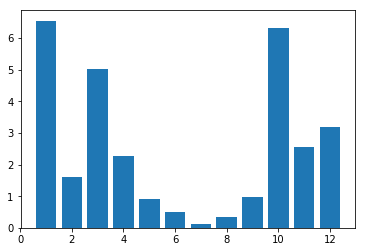

In [57]:
plt.bar(np.arange(1, len(rainfall_2003) + 1), rainfall_2003)

To briefly interpret the code snippet above, we passed two parameters to the bar function in pyplot: the first defining the index for the x-axis and the second defining the data to use for the bars (the y-axis). To create the index, we use the NumPy function `arange` to create a sequence of numbers (this is the same `arange` we encountered earlier in this section). We know that the length of our array is 12, but it can be a good habit to get into to programmatically pass the length of an array in case it changes or you don’t know it with specificity. We also added 1 to both the start and the end of the `arange` to accommodate for Python zero-indexing (because there is no “month-zero” in the calendar).

Looking at the chart above (and as residents can attest), Seattle can have lovely, sunny summers. However, this is only a first glimpse of the data. There are still several questions we would like to answer, such as in how many months did it rain, or what was the average precipitation in those months? We would use masking to answer those questions. (We will also return to this example dataset to demonstrate concepts throughout the rest of this section.) Before we dive deeper in explaining what masking is, we should briefly touch on comparison operators in NumPy.

### Comparison operators as ufuncs

In addition to the computational operators as ufuncs that we have already encountered, NumPy also implements comparison operators such as `<` (less than) and `>` (greater than) as element-wise ufuncs. All of the standard Python comparison operations are available:

In [58]:
simple_array = np.array([1, 2, 3, 4, 5])

In [59]:
simple_array < 2  # less than

array([ True, False, False, False, False])

In [60]:
simple_array >= 4  # greater than or equal

array([False, False, False,  True,  True])

In [61]:
simple_array == 2  # equal

array([False,  True, False, False, False])

It is also possible to do an element-wise comparison of two arrays, and to include compound expressions:

In [62]:
(2 * simple_array) == (simple_array ** 2)

array([False,  True, False, False, False])

As with the arithmetic operators, these comparison operators are wrappers for the NumPy ufuncs: when you write ``x < 3``, NumPy actually uses ``np.less(x, 3)``. Here is a summary of the comparison operators and their equivalent ufuncs:

| Operator	    | Equivalent ufunc    || Operator	   | Equivalent ufunc    |
|:--------------|:--------------------||:--------------|:--------------------|
|``==``         |``np.equal``         ||``!=``         |``np.not_equal``     |
|``<``          |``np.less``          ||``<=``         |``np.less_equal``    |
|``>``          |``np.greater``       ||``>=``         |``np.greater_equal`` |

Just like the arithmetic ufuncs, the comparison ufuncs work on arrays of any size and shape.

In [63]:
rand = np.random.RandomState(0)
two_dim_array = rand.randint(10, size=(3, 4))
two_dim_array

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [64]:
two_dim_array < 6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])

The result is a Boolean array, and NumPy provides a number of straightforward patterns for working with these Boolean results.

## Working with Boolean arrays

Given a Boolean array, there are a host of useful operations you can do.
We'll work with `two_dim_array`, the two-dimensional array we created earlier.

In [65]:
print(two_dim_array)

[[5 0 3 3]
 [7 9 3 5]
 [2 4 7 6]]


### Counting entries

To count the number of ``True`` entries in a Boolean array, ``np.count_nonzero`` is useful:

In [66]:
# how many values less than 6?
np.count_nonzero(two_dim_array < 6)

8

We see that there are eight array entries that are less than 6.
Another way to get at this information is to use ``np.sum``; in this case, ``False`` is interpreted as ``0``, and ``True`` is interpreted as ``1``:

In [67]:
np.sum(two_dim_array < 5)

6

The benefit of `sum()` is that, like with other NumPy aggregation functions, this summation can be done along rows or columns as well:

In [68]:
# how many values less than 5 in each row?
np.sum(two_dim_array < 5, axis=1)

array([3, 1, 2])

This counts the number of values less than 5 in each row of the matrix.

If we're interested in quickly checking whether any or all the values are true, we can use (you guessed it) ``np.any`` or ``np.all``:

In [ ]:
# Are there any values less than zero?
np.any(two_dim_array < 0)

### Exercise:

In [ ]:
# Now check to see if all values less than 10?
# Hint: use np.all()


``np.all`` and ``np.any`` can be used along particular axes as well. For example:

In [ ]:
# are all values in each row less than 7?
np.all(two_dim_array < 7, axis=1)

Here, all the elements in the first and third rows are less than 7, while this is not the case for the second row.

**A reminder:** Python has built-in `sum()`, `any()`, and `all()` functions. These have a different syntax than the NumPy versions, and, in particular, will fail or produce unintended results when used on multidimensional arrays. Be sure that you are using `np.sum()`, `np.any()`, and `np.all()` for these examples.

### Boolean operators

We've already seen how we might count, say, all months with rain less than four inches, or all months with more than two inches of rain. But what if we want to know about all months with rain less than four inches and greater than one inch? This is accomplished through Python's *bitwise logic operators*, `&`, `|`, `^`, and `~`. Like with the standard arithmetic operators, NumPy overloads these as ufuncs which work element-wise on (usually Boolean) arrays.

For example, we can address this sort of compound question as follows:

In [ ]:
np.sum((rainfall_2003 > 0.5) & (rainfall_2003 < 1))

So we see that there are two months with rainfall between 0.5 and 1.0 inches.
Note that the parentheses here are important—because of operator-precedence rules, with parentheses removed, this expression would be evaluated as follows, which results in an error:

In [ ]:
rainfall_2003 > (0.5 & rainfall_2003) < 1

Using the equivalence of *A AND B and NOT (NOT A OR NOT B)* (which you might remember if you've taken an introductory logic course), we can compute the same result in a different manner:

In [ ]:
np.sum(~((rainfall_2003 <= 0.5) | (rainfall_2003 >= 1)))

Combining comparison operators and Boolean operators on arrays can lead to a wide range of efficient logical operations.

The following table summarizes the bitwise Boolean operators and their equivalent ufuncs:

| Operator	    | Equivalent ufunc    || Operator	   | Equivalent ufunc    |
|:--------------|:--------------------||:--------------|:--------------------|
|``&``          |``np.bitwise_and``   ||&#124;         |``np.bitwise_or``    |
|``^``          |``np.bitwise_xor``   ||``~``          |``np.bitwise_not``   |

Using these tools, you can start to answer the types of questions we listed above about the Seattle rainfall data. Here are some examples of results we can compute when combining masking with aggregations:

In [69]:
print("Number of months without rain:", np.sum(rainfall_2003 == 0))
print("Number of months with rain:   ", np.sum(rainfall_2003 != 0))
print("Months with more than 1 inch: ", np.sum(rainfall_2003 > 1))
print("Rainy months with < 1 inch:   ", np.sum((rainfall_2003 > 0) &
                                              (rainfall_2003 < 1)))

Number of months without rain: 0
Number of months with rain:    12
Months with more than 1 inch:  7
Rainy months with < 1 inch:    5


## Boolean arrays as masks

In the prior section, we looked at aggregates computed directly on Boolean arrays.
A more powerful pattern is to use Boolean arrays as masks, to select particular subsets of the data themselves.
Returning to our `two_dim_array` array from before, suppose we want an array of all values in the array that are less than 5:

In [70]:
two_dim_array

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

You can obtain a Boolean array for this condition easily:

In [71]:
two_dim_array < 5

array([[False,  True,  True,  True],
       [False, False,  True, False],
       [ True,  True, False, False]])

Now, to *select* these values from the array, you can simply index on this Boolean array. This is the *masking* operation:

In [72]:
two_dim_array[two_dim_array < 5]

array([0, 3, 3, 3, 2, 4])

What is returned is a one-dimensional array filled with all the values that meet your condition. Put another way, these are all the values in positions at which the mask array is ``True``.

You can use masking as a way to compute some relevant statistics on the Seattle rain data:

In [ ]:
# Construct a mask of all rainy months
rainy = (rainfall_2003 > 0)

# Construct a mask of all summer months (June through September)
months = np.arange(1, 13)
summer = (months > 5) & (months < 10)

print("Median precip in rainy months in 2003 (inches):   ", 
      np.median(rainfall_2003[rainy]))
print("Median precip in summer months in 2003 (inches):  ", 
      np.median(rainfall_2003[summer]))
print("Maximum precip in summer months in 2003 (inches): ", 
      np.max(rainfall_2003[summer]))
print("Median precip in non-summer rainy months (inches):", 
      np.median(rainfall_2003[rainy & ~summer]))

> **Takeaway:** By combining Boolean operations, masking operations, and aggregates, you can quickly answer questions similar to those we posed about the Seattle rainfall data about any dataset. Operations like these will form the basis for the data exploration and preparation for analysis that will by our primary concerns in Sections 4 and 5.